In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [5]:
data=pd.read_csv("crime_data.csv")

In [6]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Data Preprocessing and EDA

In [7]:
data = data.rename({'Unnamed: 0':'State'}, axis = 1)
data

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [8]:
data.count()

State       50
Murder      50
Assault     50
UrbanPop    50
Rape        50
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [30]:
data.isna().sum()

State            0
Murder           0
Assault          0
UrbanPop         0
Rape             0
clustersid_HC    0
dtype: int64

# AgglomerativeClustering

In [11]:
scaler = MinMaxScaler()

scaler_df = scaler.fit_transform(data.iloc[:,1:])
print(scaler_df)

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

In [ ]:
plt.scatter()

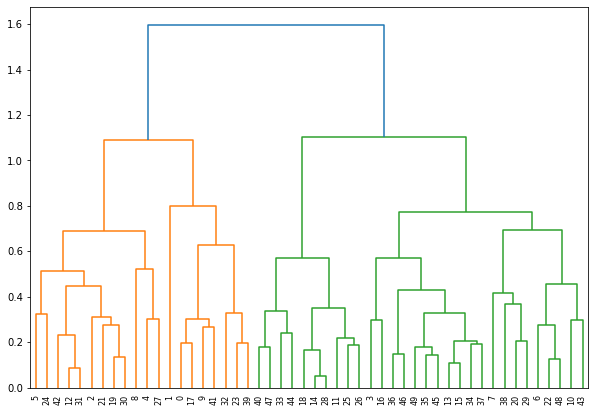

In [12]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler_df,'complete'))

In [13]:
H_clusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=4)

In [14]:
y=pd.DataFrame(H_clusters.fit_predict(scaler_df),columns=['clustersid'])
y['clustersid'].value_counts()

0    18
1    13
2    12
3     7
Name: clustersid, dtype: int64

In [15]:
data['clustersid_HC']=H_clusters.labels_
data

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [16]:
data.groupby('clustersid_HC').agg(['mean']).reset_index()

,clustersid_HC,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714


In [33]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="l1", linkage='complete')
pred=cluster.fit_predict(scaler_df)

In [34]:
pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

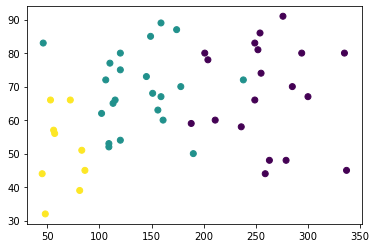

In [38]:
plt.scatter(data.iloc[:,2],data.iloc[:,3],c=pred)

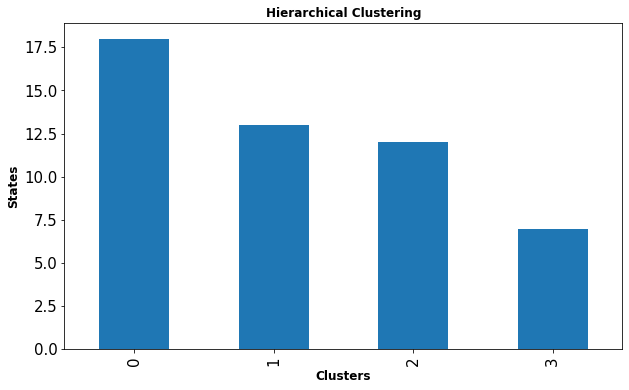

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_HC']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
sil_score= silhouette_score(scaler_df, H_clusters.labels_)
sil_score

0.3298707379986785

In [20]:
# States in cluster #0 
data[data['clustersid_HC']==0]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


In [21]:
data[data['clustersid_HC']==1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [22]:
data[data['clustersid_HC']==3]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


# K-Means Clustering

In [39]:

import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

C:\Users\shaki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shaki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shaki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shaki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

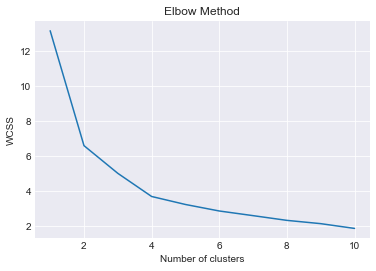

In [41]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:

KM_clusters = KMeans(4, random_state=42)
KM_clusters.fit(scaler_df)

C:\Users\shaki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [43]:
y=pd.DataFrame(KM_clusters.fit_predict(scaler_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

C:\Users\shaki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3    17
0    13
1    12
2     8
Name: clusterid_Kmeans, dtype: int64

In [44]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = KM_clusters.labels_
data

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,3,2
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,3
7,Delaware,5.9,238,72,15.8,0,3
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,2


In [45]:
data.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Murder,Assault,UrbanPop,Rape,clustersid_HC
,,mean,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923,1.846154
1,1,10.966667,264.000000,76.500000,33.608333,1.000000
2,2,13.937500,243.625000,53.750000,21.412500,2.625000
3,3,5.852941,141.176471,73.647059,19.335294,0.058824


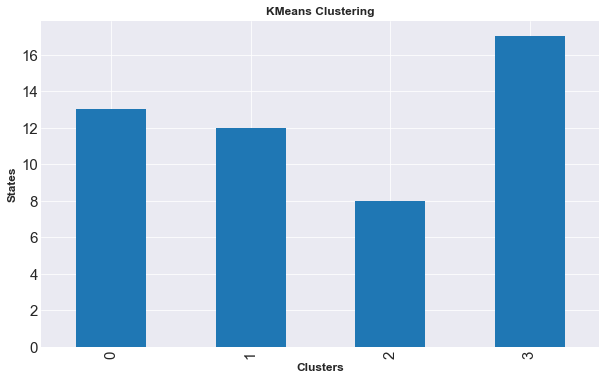

In [46]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_Kmeans']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('KMeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [47]:
# States in cluster #0 
data[data['clusterid_Kmeans']==0]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
11,Idaho,2.6,120,54,14.2,2,0
14,Iowa,2.2,56,57,11.3,2,0
16,Kentucky,9.7,109,52,16.3,0,0
18,Maine,2.1,83,51,7.8,2,0
22,Minnesota,2.7,72,66,14.9,2,0
25,Montana,6.0,109,53,16.4,2,0
26,Nebraska,4.3,102,62,16.5,2,0
28,New Hampshire,2.1,57,56,9.5,2,0
33,North Dakota,0.8,45,44,7.3,2,0
40,South Dakota,3.8,86,45,12.8,2,0


In [48]:
# States in cluster #1 
data[data['clusterid_Kmeans']==1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
8,Florida,15.4,335,80,31.9,1,1
12,Illinois,10.4,249,83,24.0,1,1
19,Maryland,11.3,300,67,27.8,1,1
21,Michigan,12.1,255,74,35.1,1,1
27,Nevada,12.2,252,81,46.0,1,1
30,New Mexico,11.4,285,70,32.1,1,1


In [49]:
# States in cluster #2 
data[data['clusterid_Kmeans']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,3,2
3,Arkansas,8.8,190,50,19.5,0,2
9,Georgia,17.4,211,60,25.8,3,2
17,Louisiana,15.4,249,66,22.2,3,2
23,Mississippi,16.1,259,44,17.1,3,2
32,North Carolina,13.0,337,45,16.1,3,2
39,South Carolina,14.4,279,48,22.5,3,2
41,Tennessee,13.2,188,59,26.9,3,2


In [50]:
# States in cluster #1 
data[data['clusterid_Kmeans']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,3,2
3,Arkansas,8.8,190,50,19.5,0,2
9,Georgia,17.4,211,60,25.8,3,2
17,Louisiana,15.4,249,66,22.2,3,2
23,Mississippi,16.1,259,44,17.1,3,2
32,North Carolina,13.0,337,45,16.1,3,2
39,South Carolina,14.4,279,48,22.5,3,2
41,Tennessee,13.2,188,59,26.9,3,2


# DBSCAN

In [52]:
from sklearn.cluster import DBSCAN

# we will try for different values of esp and min_samples

In [55]:
EPS = [0.22, 0.24, 0.26,0.28, 0.30]

for n in EPS:
    dbscan = DBSCAN(eps=n, min_samples=4)
    dbscan.fit(scaler_df)
    y=pd.DataFrame(dbscan.fit_predict(scaler_df),columns=['clusterid_DBSCAN'])
    print(f'For eps = {n}','\n',y['clusterid_DBSCAN'].value_counts())
    # silhouette score
    sil_score= silhouette_score(scaler_df, dbscan.labels_)
    print(f'For eps silhouette score = {n}','\n', sil_score)

For eps = 0.22 
 -1    32
 0    18
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.22 
 0.23530254327069516
For eps = 0.24 
 -1    22
 1    20
 0     4
 2     4
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.24 
 0.09406160443056966
For eps = 0.26 
  1    29
-1    17
 0     4
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.26 
 0.22475300564355863
For eps = 0.28 
  2    29
-1     8
 1     7
 0     6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.28 
 0.2609122917630667
For eps = 0.3 
  1    37
 0     7
-1     6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.3 
 0.2473858809927262


# we have value of epsilon=0.28,we are getting 3 clusters silhouette score is more as compared to other dbscan models.
 #-1shows the noisy data point 

In [56]:
dbscan = DBSCAN(eps=0.28, min_samples=4)
dbscan.fit(scaler_df)

DBSCAN(eps=0.28, min_samples=4)

In [57]:
data['clusterid_DBSCAN'] = dbscan.labels_
data.head()

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,3,2,0
1,Alaska,10.0,263,48,44.5,1,1,-1
2,Arizona,8.1,294,80,31.0,1,1,1
3,Arkansas,8.8,190,50,19.5,0,2,2
4,California,9.0,276,91,40.6,1,1,-1


In [58]:
data.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean
0,-1,10.387500,228.125000,74.125000,32.937500,1.000000,1.62500
1,0,14.216667,258.000000,53.333333,21.000000,3.000000,2.00000
2,1,11.014286,262.571429,77.142857,28.800000,1.000000,1.00000
3,2,4.962069,114.724138,62.896552,16.224138,0.862069,1.62069


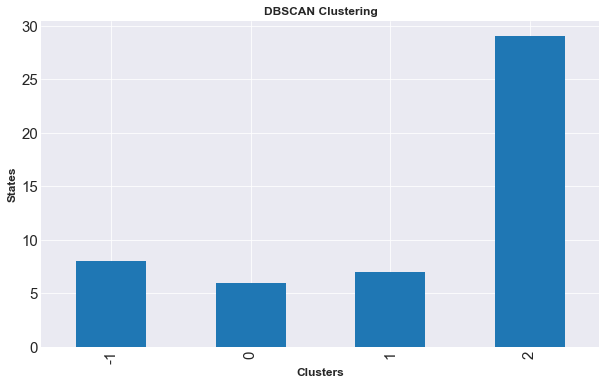

In [59]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_DBSCAN']).count()['State'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [60]:
# States in cluster #0 
data[data['clusterid_DBSCAN']==0]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,3,2,0
17,Louisiana,15.4,249,66,22.2,3,2,0
23,Mississippi,16.1,259,44,17.1,3,2,0
32,North Carolina,13.0,337,45,16.1,3,2,0
39,South Carolina,14.4,279,48,22.5,3,2,0
41,Tennessee,13.2,188,59,26.9,3,2,0


In [61]:
# States in cluster #1 
data[data['clusterid_DBSCAN']==1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
2,Arizona,8.1,294,80,31.0,1,1,1
12,Illinois,10.4,249,83,24.0,1,1,1
19,Maryland,11.3,300,67,27.8,1,1,1
21,Michigan,12.1,255,74,35.1,1,1,1
30,New Mexico,11.4,285,70,32.1,1,1,1
31,New York,11.1,254,86,26.1,1,1,1
42,Texas,12.7,201,80,25.5,1,1,1


In [62]:
# States in cluster #2 
data[data['clusterid_DBSCAN']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
3,Arkansas,8.8,190,50,19.5,0,2,2
6,Connecticut,3.3,110,77,11.1,0,3,2
11,Idaho,2.6,120,54,14.2,2,0,2
13,Indiana,7.2,113,65,21.0,0,3,2
14,Iowa,2.2,56,57,11.3,2,0,2
15,Kansas,6.0,115,66,18.0,0,3,2
16,Kentucky,9.7,109,52,16.3,0,0,2
18,Maine,2.1,83,51,7.8,2,0,2
20,Massachusetts,4.4,149,85,16.3,0,3,2
22,Minnesota,2.7,72,66,14.9,2,0,2


In [63]:
# States in cluster #1 
data[data['clusterid_DBSCAN']==-1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
1,Alaska,10.0,263,48,44.5,1,1,-1
4,California,9.0,276,91,40.6,1,1,-1
5,Colorado,7.9,204,78,38.7,1,1,-1
7,Delaware,5.9,238,72,15.8,0,3,-1
8,Florida,15.4,335,80,31.9,1,1,-1
9,Georgia,17.4,211,60,25.8,3,2,-1
10,Hawaii,5.3,46,83,20.2,0,3,-1
27,Nevada,12.2,252,81,46.0,1,1,-1
